# Goals
1.   Visualize lipid and biomass changes based on NO3 starvation.
2.   Gather numerical insights about the change in lipid content based on the length and extremity of the starvation period.

The algae strain used in the data is *Chlamydomonas reinhardtii* (CC-1690).

### Guide to Variable Names

*   NR - Nile Red, a lipophilic stain used as a proxy for the amount of lipids in the sample.
*   QY - Quantum Yield, a proxy for the health of the algae.
*   OD - Optical Density, a proxy for the biomass of the algae.
*   Counts - Cell count for the sample.
*   BD or BODIPY - Another chemical compound used as a proxy to measure the amount of lipids.





# Loading Libraries & Data

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd
from sklearn import preprocessing
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
print("Setup Complete")

Setup Complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
src_url = 'https://raw.githubusercontent.com/aabansal/AlgaeBiofuels/master/data/raw/All_Phenotype_Data_N_starvation.csv'
df = pd.read_csv(src_url)
df.head()

,Date,Hours,Time,Timepoint,Supplementation,Replicate,Starvation,Counts_Tech1,Counts_Tech2,Counts_Tech3,Counts_Tech4,Counts_DF,QY_Tech1,QY_Tech2,QY_Tech3,OD680_Tech1,OD680_Tech2,OD680_Tech3,OD720_Tech1,OD720_Tech2,OD720_Tech3,Nile_Red1,Nile_Red2,Nile_Red3,NR_DF,Bodipy_1,Bodipy_2,Bodipy_3,BD_DF,pH,Counts_Avg,QY_Avg,OD680_Avg,OD720_Avg,NR_Avg,Specific_NR,BD_Avg,Specific_BD,mM_NO3,mM_PO4,mM_SO4
0,24-Jun,0.00,10:00,R,Replete,A,N,13,2,7,12,1,0.68,0.66,0.67,0.0350,0.0356,0.0347,0.0366,0.0353,0.0357,210,198,132,1,Nan,Nan,Nan,2,8.14,94350,0.670000,0.035100,0.035867,9.500000,0.100689,Nan,Nan,12.374411,0.572915,675.4125
1,24-Jun,12.00,22:00,R,Replete,A,N,19,27,15,14,1,0.66,0.68,0.67,0.0386,0.0401,0.0390,0.0211,0.0223,0.0236,307,290,302,1,Nan,Nan,Nan,2,8.10,208125,0.670000,0.039233,0.022333,129.166667,0.620621,Nan,Nan,17.025835,0.621113,607.4250
2,25-Jun,24.00,10:00,R,Replete,A,N,158,129,10,164,1,0.79,0.79,0.79,0.0998,0.1024,0.1070,0.0524,0.0565,0.0526,924,1039,968,1,2267,2062,2120,2,8.19,1279275,0.790000,0.103067,0.053833,806.500000,0.630435,-974.6666667,-0.761889873,16.795186,0.663527,613.2000
3,25-Jun,36.00,22:00,R,Replete,A,N,19,49,29,39,10,0.77,0.76,0.76,0.2465,0.2251,0.2367,0.1085,0.0829,0.0812,917,956,935,2,2287,2499,2313,2,8.24,3774000,0.763333,0.236100,0.090867,1531.000000,0.405670,-541.3333333,-0.143437555,14.065838,0.650031,676.4625
4,26-Jun,47.25,9:15,S1,Replete,A,N,39,40,46,40,10,0.76,0.76,0.76,0.3999,0.3380,0.3400,0.1239,0.1291,0.1296,435,406,459,6,1813,904,1816,2,8.29,4578750,0.760000,0.359300,0.127533,1577.000000,0.344417,-2252,-0.491837292,11.278827,0.559420,702.9750


# Data Visualization

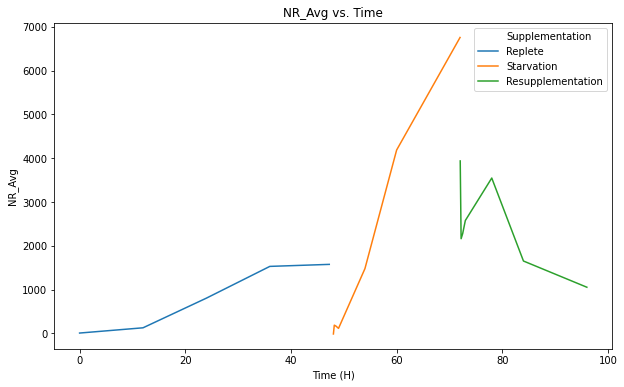

In [ ]:
#@title Graph Generator
Y = 'NR_Avg' #@param ["Counts_Avg", "QY_Avg", "OD680_Avg", "OD720_Avg", "NR_Avg", "Specific_NR", "BD_Avg", "Specific_BD", "mM_NO3", "mM_PO4", "mM_SO4"]
Set = 'A' #@param ["A", "B"]
Supplementation = 'All' #@param ["Replete", "Starvation", "Resupplementation", "All"]
Plot = 'Line' #@param ["Line", "Scatter"]

# Sort by Set
df_used = df.loc[df['Replicate'] == Set]
# Sort by Supplementation
if Supplementation != 'All':
  df_used = df_used.loc[df_used['Supplementation'] == Supplementation]
# Generate Plots
if Plot == 'Line':
  plt.figure(figsize=(10,6))
  ax = sns.lineplot(x=df_used['Hours'], y=df_used[Y], hue=df_used['Supplementation'])
  ax.set(title = Y + " vs. Time", xlabel='Time (H)', ylabel=Y)
elif Plot == 'Scatter':
  plt.figure(figsize=(10,6))
  ax = sns.scatterplot(x=df_used['Hours'], y=df_used[Y], hue=df_used['Supplementation'])
  ax.set(title = Y + " vs. Time", xlabel='Time (H)', ylabel=Y)

# Numerical Insights About Supplementation Periods
What is the slope of lipid accumulation during these periods? Changes in biomass?



Replete:
LinregressResult(slope=33.37644629696358, intercept=1563.7745114456704, rvalue=0.8767654153989414, pvalue=0.0008673489788120798, stderr=6.472662891076955)
LinregressResult(slope=0.002194328737957919, intercept=0.11890970572168374, rvalue=0.9414458336219584, pvalue=4.790289927618017e-05, stderr=0.00027784520095332655)
Starvation:
LinregressResult(slope=219.1927764958632, intercept=232.2441389530593, rvalue=0.8500763097992626, pvalue=0.0001177436976897236, stderr=39.2019485399561)
LinregressResult(slope=0.0027373098101880814, intercept=0.0442246518672921, rvalue=0.8937955345633807, pvalue=1.6420977652081384e-05, stderr=0.000396490771183071)
Resupplementation:
LinregressResult(slope=219.1927764958632, intercept=232.2441389530593, rvalue=0.8500763097992626, pvalue=0.0001177436976897236, stderr=39.2019485399561)
LinregressResult(slope=0.0027373098101880814, intercept=0.0442246518672921, rvalue=0.8937955345633807, pvalue=1.6420977652081384e-05, stderr=0.000396490771183071)


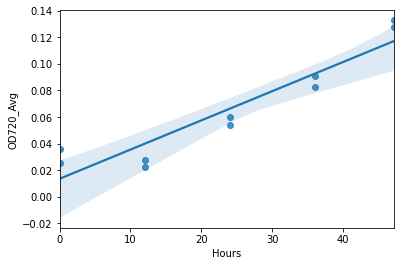

In [ ]:
df_replete = df.loc[df['Supplementation'] == 'Replete']
print('Replete:')
print(scipy.stats.linregress(df_replete['Hours']-48, df_replete['NR_Avg']))
print(scipy.stats.linregress(df_replete['Hours']-48, df_replete['OD720_Avg']))

df_starve = df.loc[df['Supplementation'] == 'Starvation']
print('Starvation:')
print(scipy.stats.linregress(df_starve['Hours']-48, df_starve['NR_Avg']))
print(scipy.stats.linregress(df_starve['Hours']-48, df_starve['OD720_Avg']))

df_resupp = df.loc[df['Supplementation'] == 'Starvation']
print('Resupplementation:')
print(scipy.stats.linregress(df_resupp['Hours']-48, df_resupp['NR_Avg']))
print(scipy.stats.linregress(df_resupp['Hours']-48, df_resupp['OD720_Avg']))

sns.regplot(x=df_replete['Hours'], y=df_replete['OD720_Avg'])

These slopes will be used to help inform our systems model in NetLogo.